# Phone marketing algorithm predicts
We have been asked by a big bank to assess their retail banking marketing algorithms. Their advanced algorithm for phone marketing makes predictions about whether or not a certain individual will sign up for a term deposit. The bank then optimizes its phone calling strategy based on that judgment.
The bank has been effective in identifying which customers are most likely to sign up for their term deposits using this algorithm.
These days, management wants to know how a classification model can influence specific decision-making procedures.

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [16]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [17]:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

There are no missing values, all of they are handle with 'unknown' etc

Since we aim to predict whether or not a client, targeted by the campaign, subscribes to a term deposit (y) after a phone call, we can exclude the 'duration' of the call from the model, as it occurs after the target event.

In [18]:
df.drop('duration', axis=1, inplace=True)

In [19]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Unique Values in each columns:

In [20]:
for i in df:
    print(f'column {i}: {df[i].unique()}')

column age: [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
column job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
column marital: ['married' 'single' 'divorced' 'unknown']
column education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
column default: ['no' 'unknown' 'yes']
column housing: ['no' 'yes' 'unknown']
column loan: ['no' 'yes' 'unknown']
column contact: ['telephone' 'cellular']
column month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
column day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
column campaign: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 2

# Deep dive into the data (correlation heatmap, plots etc)
First tranform our target variable (y) into numerical values

In [21]:
df['y']=df['y'].replace({'yes':1,'no':0})
df['y'].unique()
df.describe()

<ipython-input-21-afa91d719e80>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['y']=df['y'].replace({'yes':1,'no':0})


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


##We can see that we have an umbalanced dataset, with a mean of approx 11% of y=1 (sucess) and y=0 (no) with 89%
##Check if there is a linear relationship with the target variable

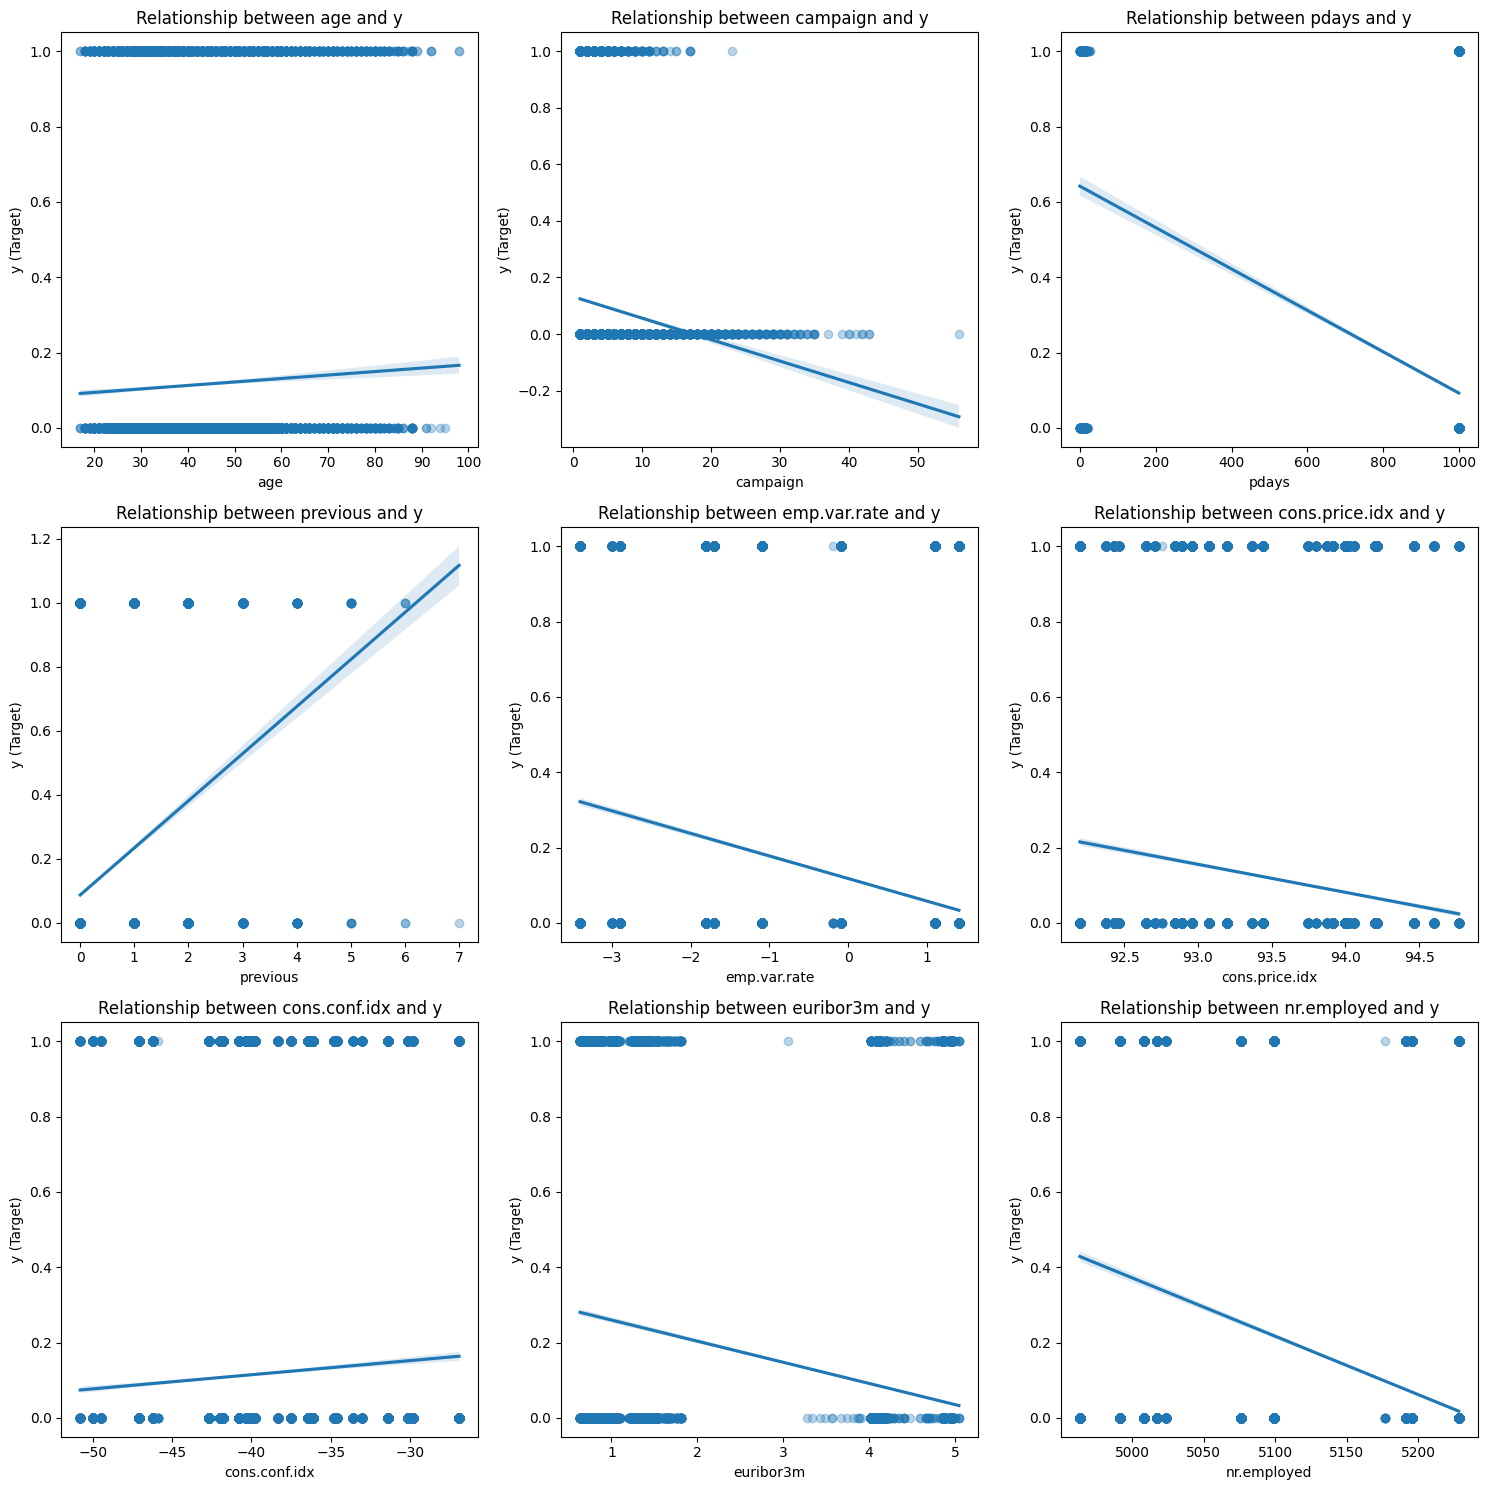

In [22]:
col = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

n_cols = 3
n_rows = -(-len(col) // n_cols)  # Ceiling division to get the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten in case of single row/column

for idx, i in enumerate(col):
    sns.regplot(x=df[i], y=df['y'], scatter_kws={'alpha':0.3}, ax=axes[idx])    #alpha=0.5, ax=axes[idx]
    axes[idx].set_xlabel(i)
    axes[idx].set_ylabel('y (Target)')
    axes[idx].set_title(f'Relationship between {i} and y')

# Remove empty subplots if the number of columns is not a multiple of 3
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##Seems that most of the features have some linear relationship with the target. So, could use logistic regression, and do not need to log linearize for the baseline model first.

##**Barplots of the variables to see how they are distributed**

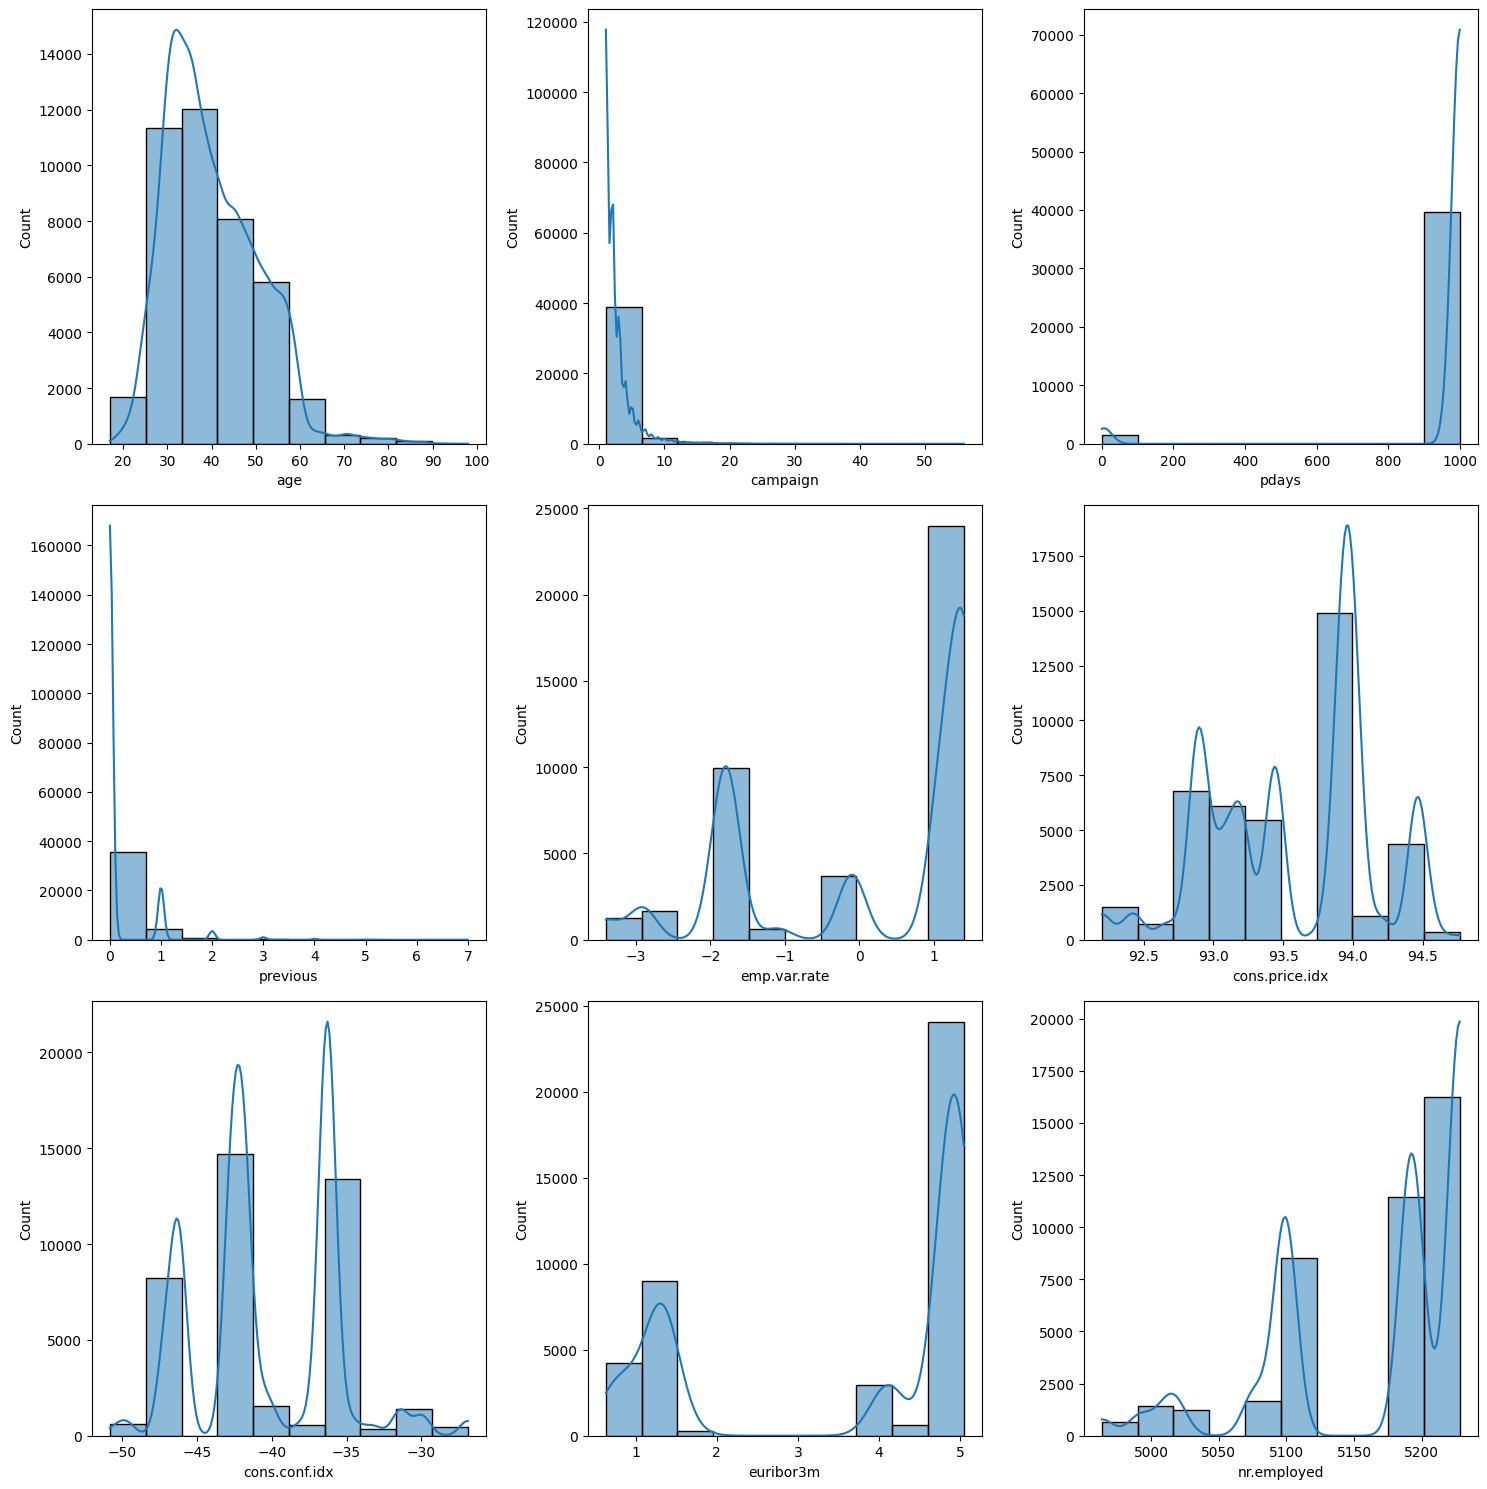

In [23]:
col = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

n_cols = 3
n_rows = -(-len(col) // n_cols)
fig,axes = plt.subplots(n_rows,n_cols,figsize=(15,5*n_rows))
axes = axes.flatten()

for idx, i in enumerate(col):
     sns.histplot(df[i],ax=axes[idx],bins =10,kde=True)
     axes[idx].set_xlabel(i)

for j in range(idx+1,len(axes)):
 fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

##**Corelation matrix**

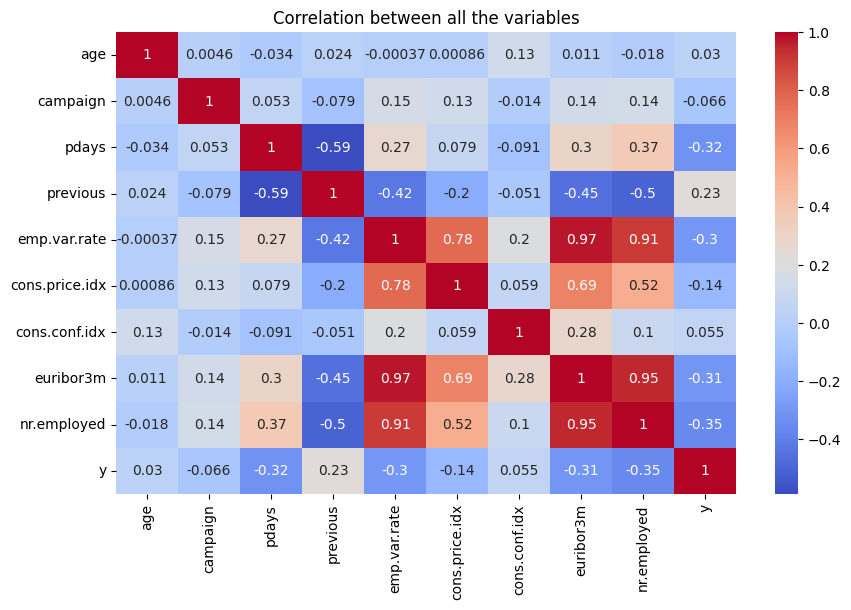

In [24]:
corr_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation between all the variables')
plt.show()

###Thus, we can observe that there is a strong correlation between nr.employed, emp.var.rate, and euribor3m (due to demographic data). I decide to keep nr.employed and drop emp.var.rate and euribor3m. (because it is within the bank's control, and since, of the three variables, nr.employed appears to have the greatest influence on our goal variable (seem belong))

###**Now examine the variable and y correlation heatmap.**

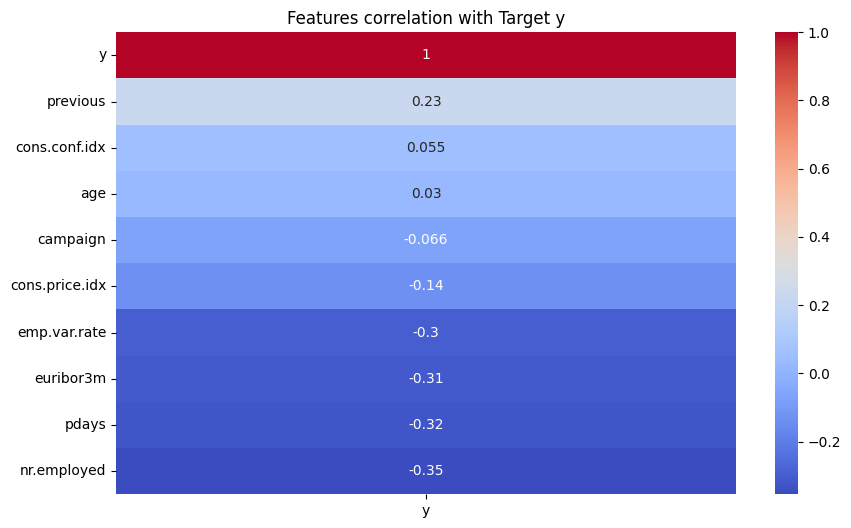

In [25]:
corr_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix[['y']].sort_values(by='y',ascending=False),annot=True,cmap='coolwarm')
plt.title('Features correlation with Target y')
plt.show()

###Thus, we can anticipate that the frequency of contact with the client ('prior') will also have a favorable effect on y and the consumer index.

###On the negative impact side, we can assume that the likelihood of a successful subscription decreased with the number of employees (or "nr.employed"). Additionally, the longer the "pdays" have elapsed since the customer was last contacted during a prior campaign, the less likely the client is to subscribe.

###We may therefore assume that in order to increase subscriptions, it's critical to keep up positive and regular communication with the clientele. We shall now conduct a more thorough analysis to verify or refute our hypothesis.

#**Data Cleaning**
## Dropping columns

In [28]:
df.drop('emp.var.rate',axis=1,inplace=True)
df.drop('euribor3m',axis=1,inplace=True)

## check the correlation matrix again

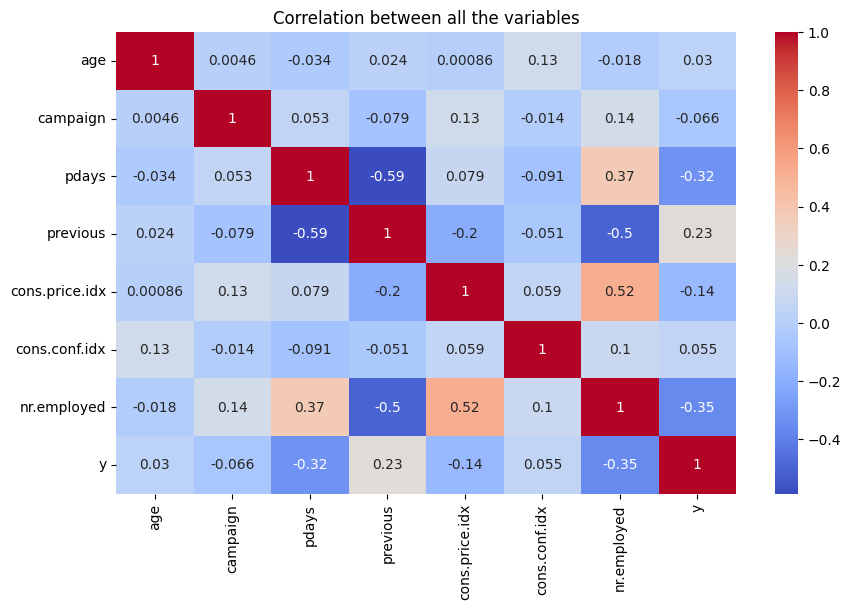

In [29]:
corr_matrix2 = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix2,annot=True,cmap='coolwarm')
plt.title('Correlation between all the variables')
plt.show()

### ok looks there is not extreme correlations anymore
### Look at duplicate and drop them
#####print(duplicates) --> yes, some duplicate ex: rows 10 and 7

In [30]:
duplicates = df[df.duplicated(keep=False)]
#print(duplicates) --> yes, some duplicate ex: rows 10 and 7
duplicates.shape

df = df.drop_duplicates().reset_index(drop=True)
df.shape

(38832, 18)

##**For the columns 'default', 'housing', 'loan', we transform the values 'yes', 'no', 'unknown' to 1,0,-1.**

In [31]:
def binary_clean(column):
    df[column]=df[column].replace({'yes':1,'no':0,'unknown':-1})


column_name = ['default','housing','loan']

for i in column_name:
    binary_clean(i)

<ipython-input-31-30a5420813a2>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column]=df[column].replace({'yes':1,'no':0,'unknown':-1})


In [32]:
for i in df:
    print(f'{i}: {df[i].unique()}')

age: [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: [ 0 -1  1]
housing: [ 0  1 -1]
loan: [ 0  1 -1]
contact: ['telephone' 'cellular']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
campaign: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
pdays: [999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16


### **For the columns who values have order, we label encoded them (columns: 'education','month','day_of_week')**

In [33]:
def label_encode(df,columns,order=None):
    label_encoder = LabelEncoder()
    label_encoder.fit(order if order else df[columns].unique())
    df[columns]= label_encoder.transform(df[columns])

In [34]:
label_encode(df,'education',order=['illiterate','basic.4y','basic.6y','basic.9y','high.school','university.degree','professional.course','unknown'])
label_encode(df,'month',order=['mar','apr','may','jun','jul','aug', 'sep','oct','nov','dec'])
label_encode(df,'day_of_week',order=['mon','tue','wed','thu','fri'])

##**For columns 'poutcome' we transform into '1' for success, '0' for failure and '-1' for nonexistent**

In [35]:
df['poutcome'] = df['poutcome'].replace({'success':1,'failure':0,'nonexistent':-1})

<ipython-input-35-73bfe2a69b06>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['poutcome'] = df['poutcome'].replace({'success':1,'failure':0,'nonexistent':-1})


###**Now we one-hot encode the remaining columns (they do not contains any order)**

In [36]:
def one_hot(df,colonne):

    # Apply one-hot encoding
    df = pd.get_dummies(df, columns=colonne, drop_first=True)

    return df

In [37]:
columns = ['job','marital','contact']
df = one_hot(df,columns)

In [38]:
for i in df:
    print(f'column {i}: {df[i].unique()}')

column age: [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
column education: [0 3 1 2 5 7 6 4]
column default: [ 0 -1  1]
column housing: [ 0  1 -1]
column loan: [ 0  1 -1]
column month: [6 4 3 1 8 7 2 5 0 9]
column day_of_week: [1 3 4 2 0]
column campaign: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
column pdays: [999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
column previous: [0 1 2 3 4 5 6 7]
column poutcome: [-1  0  1]
column cons.price.idx: [93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.767]
column cons.conf.idx: [-

In [39]:
df.describe()

,age,education,default,housing,loan,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,y
count,38832.000000,38832.000000,38832.000000,38832.000000,38832.000000,38832.000000,38832.000000,38832.000000,38832.000000,38832.000000,38832.000000,38832.000000,38832.000000,38832.000000,38832.000000
mean,40.164916,3.739133,-0.210548,0.496807,0.133292,4.264756,1.995365,2.633833,960.285100,0.181139,-0.822080,93.574748,-40.524045,5165.494950,0.118330
std,10.491457,2.138609,0.407893,0.548106,0.407372,2.316573,1.398605,2.830577,192.213253,0.506248,0.465761,0.585113,4.652459,72.994163,0.323003
min,17.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,92.201000,-50.800000,4963.600000,0.000000
25%,32.000000,2.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,999.000000,0.000000,-1.000000,93.075000,-42.700000,5099.100000,0.000000
50%,38.000000,3.000000,0.000000,1.000000,0.000000,4.000000,2.000000,2.000000,999.000000,0.000000,-1.000000,93.749000,-41.800000,5191.000000,0.000000
75%,47.000000,6.000000,0.000000,1.000000,0.000000,6.000000,3.000000,3.000000,999.000000,0.000000,-1.000000,93.994000,-36.400000,5228.100000,0.000000
max,98.000000,7.000000,1.000000,1.000000,1.000000,9.000000,4.000000,56.000000,999.000000,7.000000,1.000000,94.767000,-26.900000,5228.100000,1.000000


In [40]:
df['default'].value_counts()

,count
default,
0,30650
-1,8179
1,3


For the column 'pdays' if the clients was not contacted previously, the 'pdays'=999. It's an extreme value compare to others values that are betwen 6 to 20. So, we will create a binary variable to know if the client was contacted previously or not in order to grasp this information in our dataset

In [41]:
prev_contact=df['pdays']!=999

for index,i in enumerate(prev_contact):
    if i:
        df.loc[index,'pre_cont']=1
    else:
        df.loc[index,'pre_cont']=0

#**Model Training**

In [42]:
from sklearn.preprocessing import StandardScaler


###**Train Test Split**

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [44]:
df = shuffle(df, random_state=42).reset_index(drop=True)
X = df.iloc[:, :-1]
y = df.loc[:,'y']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=24)

x_train.head()
y_train.head()
x_test.head()

,age,education,default,housing,loan,month,day_of_week,campaign,pdays,previous,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,contact_telephone
2617,46,2,0,1,0,4,3,2,999,0,...,False,False,False,False,True,False,True,False,False,False
6608,76,0,0,0,0,1,3,1,999,1,...,False,False,False,False,False,False,False,False,False,False
21115,27,3,0,1,0,3,0,1,999,0,...,False,False,False,False,False,False,False,True,False,True
35501,57,6,-1,1,0,1,4,8,999,0,...,False,False,False,True,False,False,False,True,False,False
9087,52,5,0,1,0,7,0,1,999,1,...,False,False,False,True,False,False,True,False,False,False


####**To avoid data leakage we will apply feature scaling after the split. So, we will fit and transform with the x_train and only transform for the x_test**
Feature scalling

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
columns_scale = ['age','campaign','pdays','cons.price.idx','cons.conf.idx','nr.employed']
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train[columns_scale])
x_test_scaled = scaler.transform(x_test[columns_scale])
x_train[columns_scale] = x_train_scaled
x_test[columns_scale] = x_test_scaled

x_train.head()

,age,education,default,housing,loan,month,day_of_week,campaign,pdays,previous,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,contact_telephone
13067,-0.400861,5,0,1,0,6,1,-0.573603,0.201836,0,...,False,False,False,True,False,False,False,True,False,False
37452,1.128754,6,0,-1,-1,1,2,-0.225326,0.201836,0,...,False,False,False,False,False,False,True,False,False,False
28885,0.268345,1,0,1,1,3,4,0.471229,0.201836,0,...,False,False,False,False,False,False,False,True,False,False
24650,0.841951,6,0,0,0,4,3,1.167784,0.201836,0,...,False,False,False,False,False,False,True,False,False,True
19138,1.033153,0,-1,1,1,3,1,0.122952,0.201836,0,...,False,False,False,False,False,False,True,False,False,False


The goal of this case is to a the model and provide insight into which features/variables influence the outcome of the classification the most: on a global level, and specifically for observation #4 and #20.

Based on that, a decision trees or a deep learning model, will be more difficult to observe which features/variables influence the outcome.

Therefore, the logisitc regression is chosen

#**Logistic Regression**
###**Use a logisitc regression with imbalanced data and with regularization (using Lasso)**

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [48]:
model = LogisticRegression(penalty='l2', C=1, class_weight='balanced',random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

In [49]:
test_accuracy = accuracy_score(y_test,y_pred)
train_accuracy = accuracy_score(y_train,y_pred_train)
print(f'the test accuracy is {test_accuracy} \nthe train accuracy is {train_accuracy}')

the test accuracy is 1.0 
the train accuracy is 1.0


In [50]:
y_test.unique()

array([1, 0])

### **check that the prediction and the true value are the same**

In [51]:

check = pd.concat([pd.Series(y_pred, name="Predicted",index=y_test.index), y_test], axis=1)
print(check.head(100))
y_test_numpy = y_test.to_numpy()

any(y_pred!=y_test_numpy)

       Predicted  y
2617           1  1
6608           1  1
21115          0  0
35501          0  0
9087           0  0
...          ... ..
6853           0  0
926            0  0
6275           0  0
36940          0  0
19065          0  0

[100 rows x 2 columns]


False

### Return False, so predict everything correctly
##**Cross validation with logistic regression**

In [52]:
from sklearn.model_selection import cross_val_score

# Using cross-validation to evaluate model performance
model_cross = LogisticRegression(penalty='l2', C=1, class_weight='balanced',random_state=42)
cross_val_scores = cross_val_score(model_cross, x_train, y_train, cv=6)

print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation score:", cross_val_scores.mean())

Cross-validation scores: [1. 1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0


#**Confusion matrix**

In [53]:
cnf_matrix = confusion_matrix(y_test,y_pred,labels=[1,0])
np.set_printoptions(precision=2)
print(cnf_matrix)

[[ 1407     0]
 [    0 10243]]


#**Classification Report**

In [54]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)

              precision  recall  f1-score  support
0                   1.0     1.0       1.0  10243.0
1                   1.0     1.0       1.0   1407.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0  11650.0
weighted avg        1.0     1.0       1.0  11650.0


We can see that retired individuals ('job_retired'), who are typically older, tend to subscribe more to a term deposit after a call. Additionally, if a client has previously had a credit default ('default'), there is a higher chance that they will subscribe to a term deposit after a call. While a default may indicate financial difficulties, it could also suggest that the person is willing to take risks and invest in a term deposit to stabilize their financial situation.


On the other hand, the overall economic situation also influences the likelihood of subscribing to a term deposit. When the quarterly 'nr.employed' (number of employees) is high, clients are less likely to subscribe. This suggests that during periods of high employment, people feel more financially confident and prefer higher-return investments, such as stocks, rather than term deposits.


Lastly, contacting clients via a landline telephone instead of a cellular (mobile) phone reduces the likelihood of them subscribing to a deposit. Even back then, there was already a shift from landlines to mobile phones. Moreover, the longer you wait before reaching out to a client, the less likely they are to subscribe. Therefore, a proactive approach in client communication is more effective.